# Credit Card User Segmentation 

## Scenario and Goal

You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering.

### Aim/Goal

To characterize behavior of credit card users/customers to offer targeted card incentives and attract new customers & Reduce costs associated with signup incentives

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read/ingest data
customer_df = pd.read_csv('../cc_info.csv', index_col=0)
customer_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
customer_df.shape

(8950, 17)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [5]:
customer_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
customer_df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Missing values in "Credit limit" and "Minimum payment". Imputation or drop missing values?

In [7]:
customer_df=customer_df.dropna()

## Exploratory Data Analysis

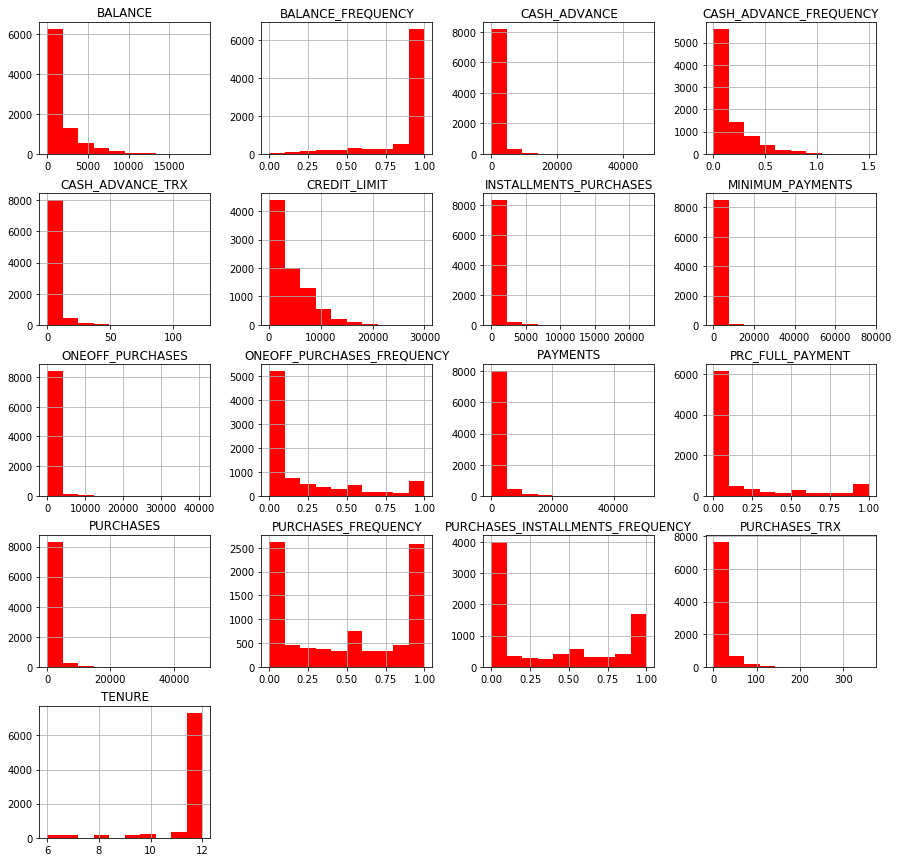

In [8]:
customer_df.hist(figsize=(15,15), bins=10, color='red')
plt.show()

There appears to be some outliers for some of the variables. Keep or remove? 

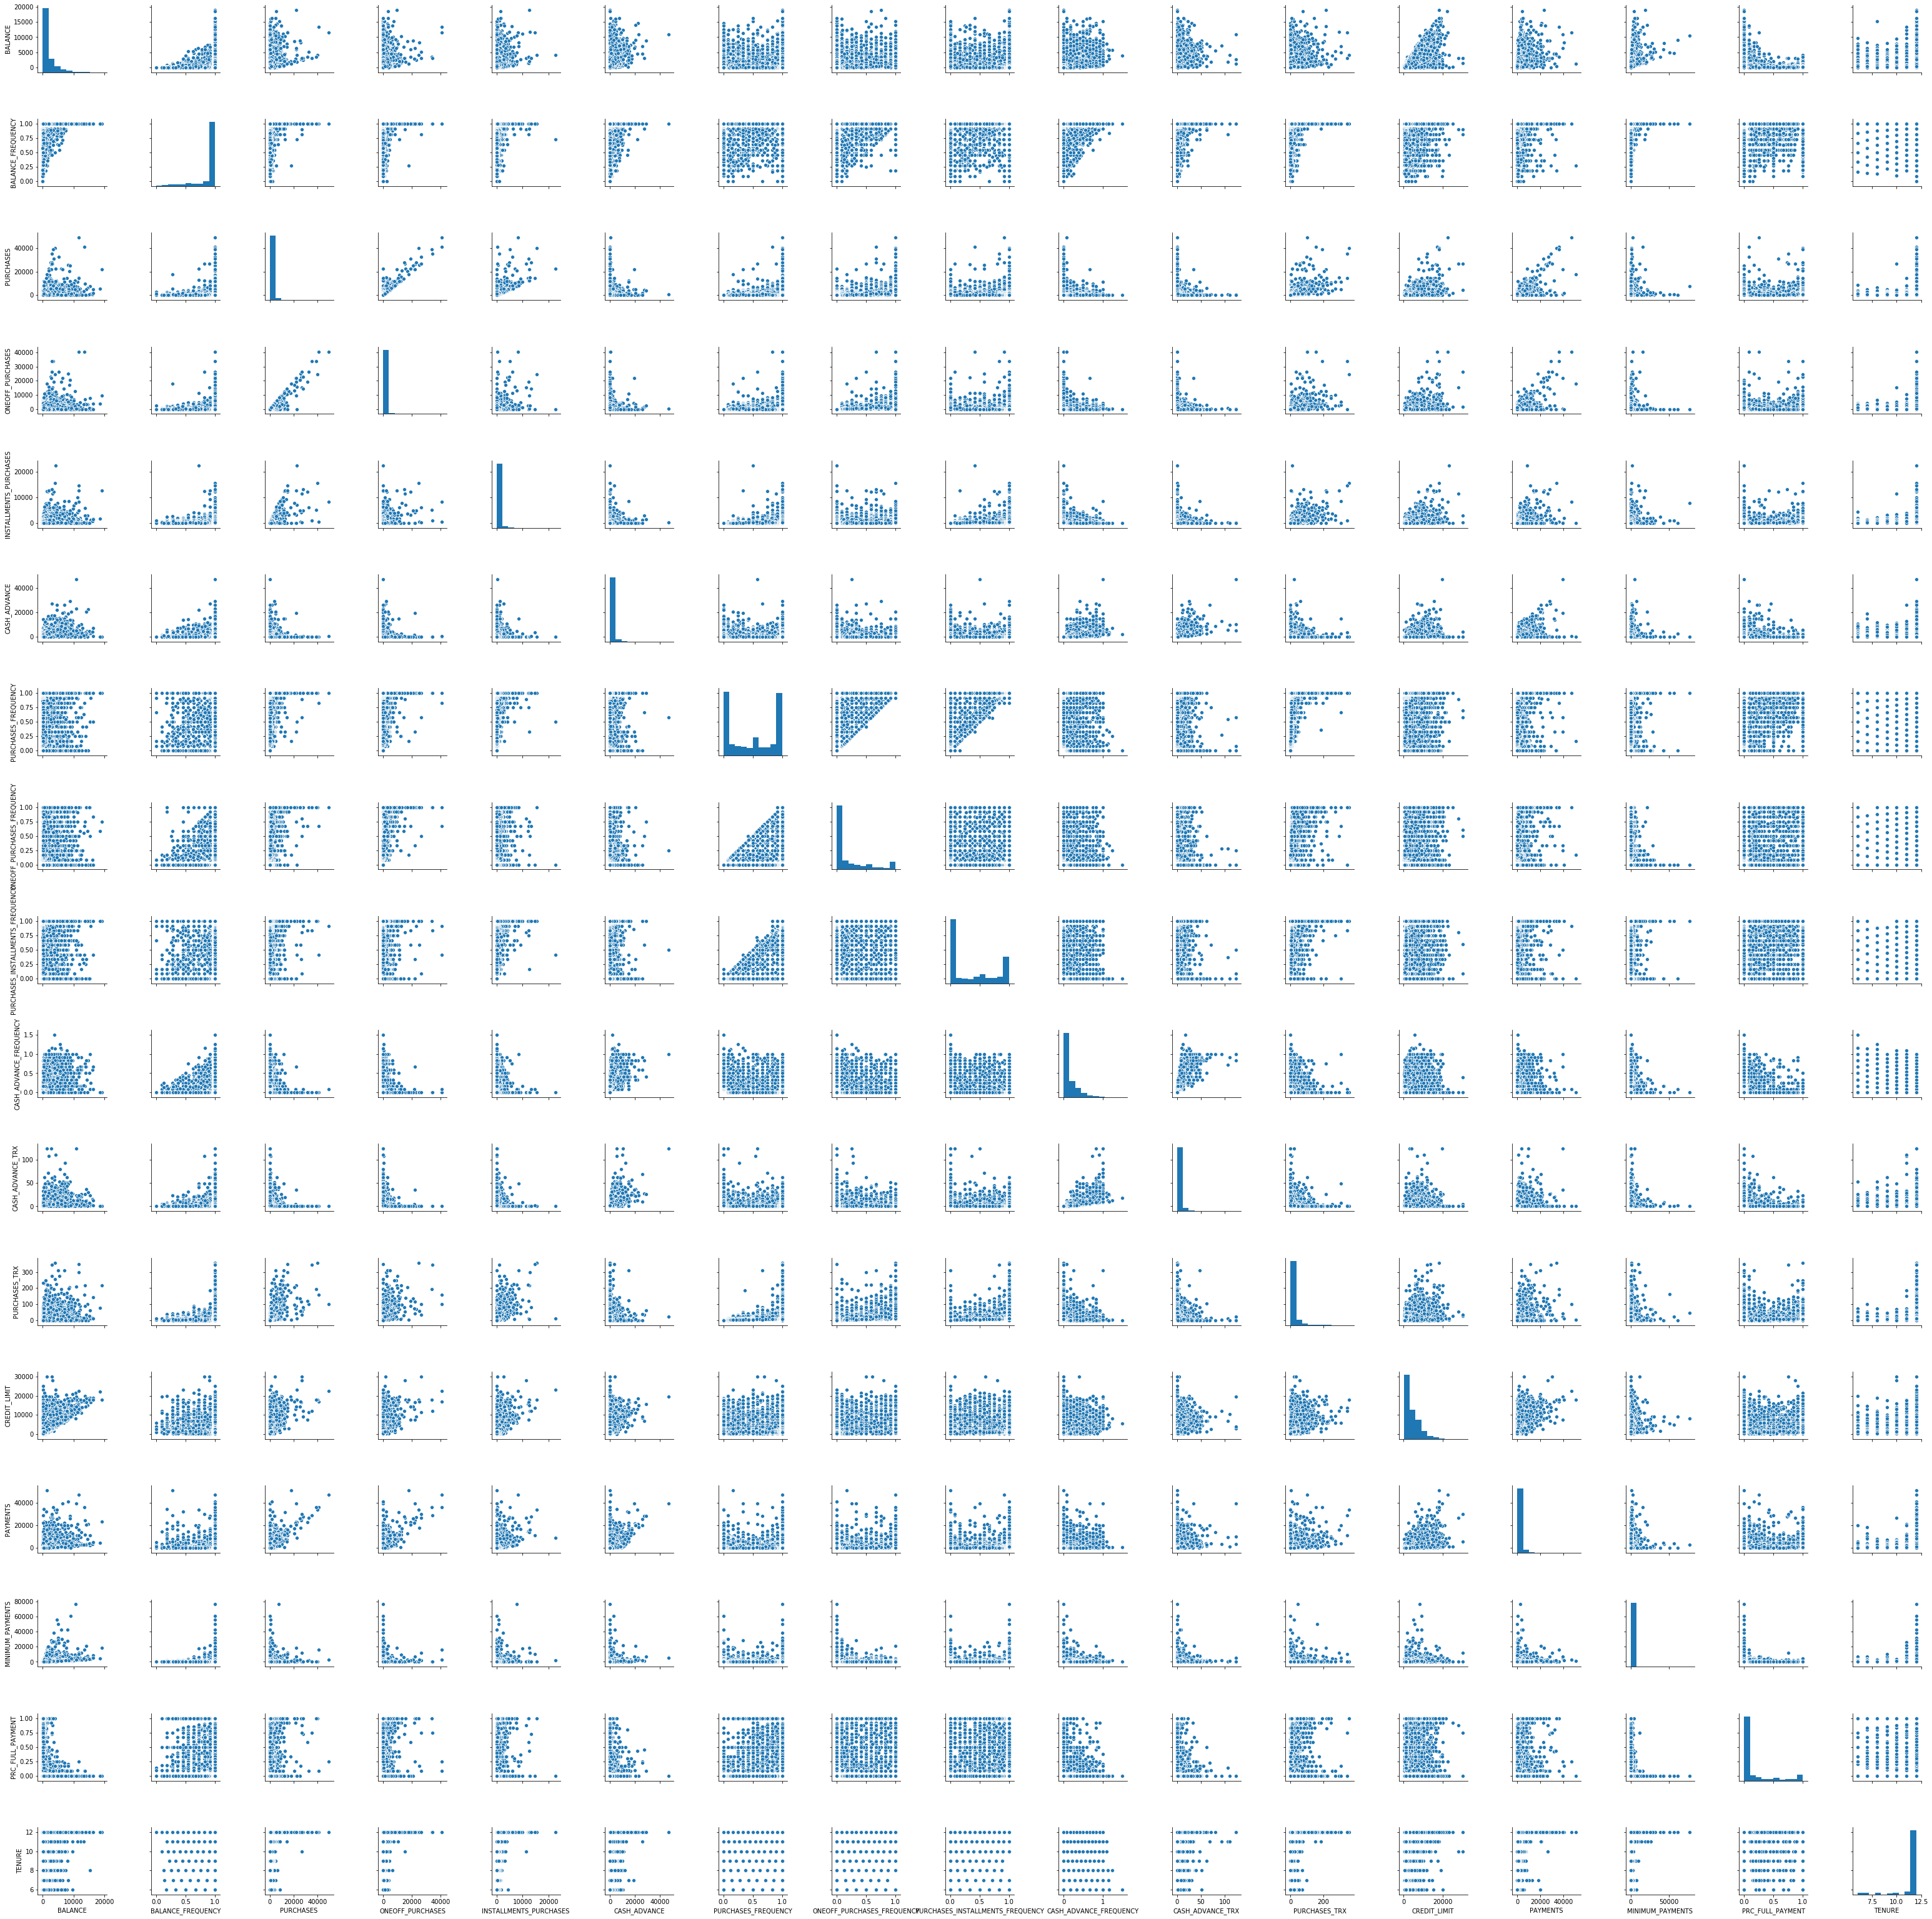

In [9]:
sns.pairplot(customer_df);

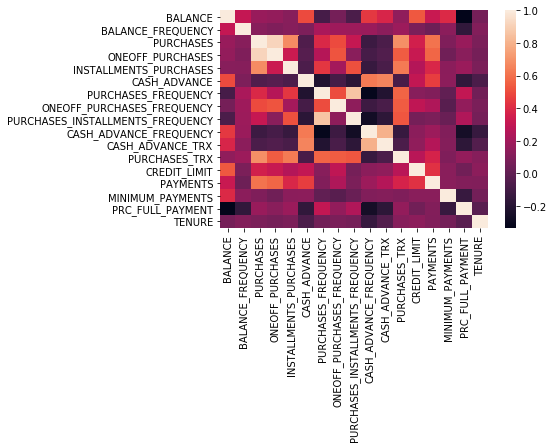

In [10]:
sns.heatmap(customer_df.corr());

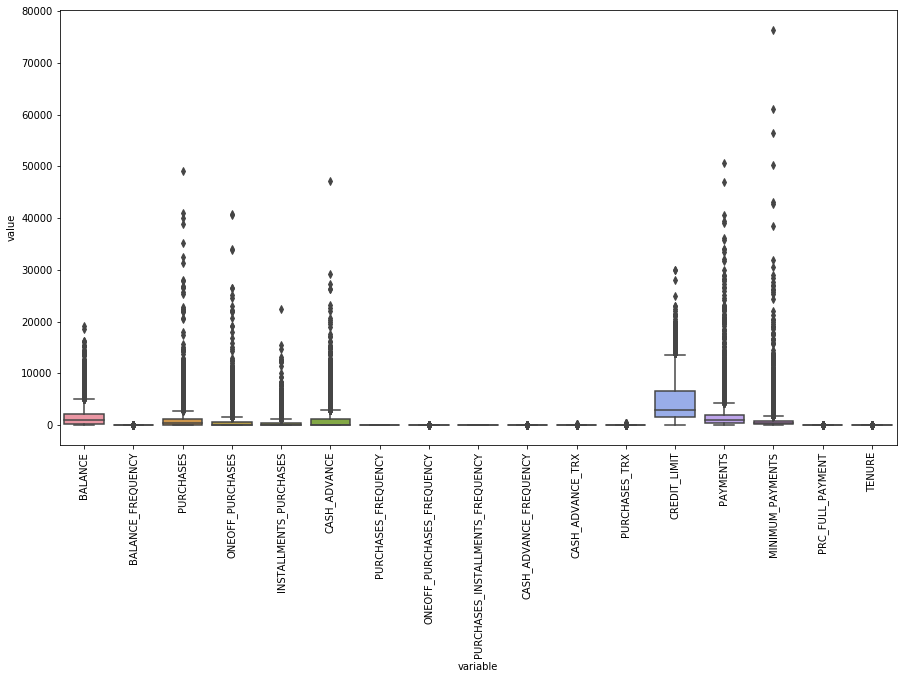

In [11]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='variable', y='value', data=pd.melt(customer_df))
#plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Since the dataset comprises a lot of features (17) there is the need to implement dimensionality reduction techniques such as Principal Component Analysis to reduce feature space. 

# Principal Component Analysis (PCA)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = sc.fit_transform(customer_df)
scaled_df = pd.DataFrame(data=scaled_df, columns=customer_df.columns)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


In [13]:
scaled_df.shape

(8636, 17)

In [14]:
from sklearn.decomposition import PCA
var_r = {}
for n in range(2,17):
    pcas = PCA(n_components=n)
    cr_pca = pcas.fit(scaled_df)
    var_r[n]=sum(cr_pca.explained_variance_ratio_)

In [15]:
var_r

{2: 0.4760548457842576,
 3: 0.565238175842071,
 4: 0.6409742688134167,
 5: 0.7037404505423913,
 6: 0.7608683118566374,
 7: 0.8100301906450036,
 8: 0.8521375332973685,
 9: 0.8889545002266004,
 10: 0.9197695792289545,
 11: 0.9434076154587299,
 12: 0.9611530116230537,
 13: 0.975420114267904,
 14: 0.987206711494945,
 15: 0.9972876832368718,
 16: 0.999999309954028}

Text(0, 0.5, 'Proportion of variance explained')

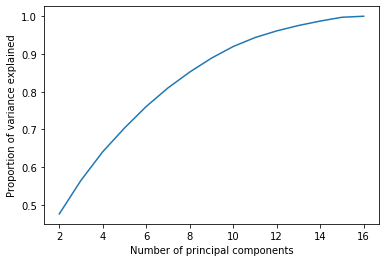

In [16]:
pd.Series(var_r).plot()
plt.xlabel('Number of principal components')
plt.ylabel('Proportion of variance explained')

8 principal components selected since 8 principal components capture at least 85% of the total variance explained

In [17]:
pca_final = PCA(n_components=8)
pca_df = pca_final.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_df, columns=['PC' + str(i) for i in range(8)])
pca_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942


In [18]:
pca_df.shape

(8636, 8)

In [19]:
pd.DataFrame(pca_final.components_.T, columns=['PC' + str(i) for i in range(8)], index=customer_df.columns)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
BALANCE,0.091986,0.405979,-0.174155,0.259423,0.075700,0.035763,-0.263369,-0.199909
BALANCE_FREQUENCY,0.109812,0.127739,-0.458853,0.159320,-0.450859,-0.014653,0.098675,0.127518
PURCHASES,0.412151,0.049530,0.242582,0.064002,-0.010410,0.195992,0.201357,-0.004961
ONEOFF_PURCHASES,0.346775,0.069930,0.368573,0.123148,-0.197021,0.173006,0.112734,0.123273
INSTALLMENTS_PURCHASES,0.337056,-0.011481,-0.103753,-0.075028,0.337489,0.145431,0.268972,-0.238348
CASH_ADVANCE,-0.030588,0.437247,-0.001726,-0.265565,0.099425,-0.132511,-0.038540,-0.004672
PURCHASES_FREQUENCY,0.323665,-0.186582,-0.355750,-0.221738,-0.088538,-0.085693,-0.157901,0.026417
ONEOFF_PURCHASES_FREQUENCY,0.294761,-0.014747,0.104743,0.055464,-0.521560,-0.096828,-0.305746,0.199749
PURCHASES_INSTALLMENTS_FREQUENCY,0.277226,-0.173577,-0.449940,-0.265293,0.175408,-0.047460,0.043229,-0.129174
CASH_ADVANCE_FREQUENCY,-0.099145,0.429997,-0.087635,-0.266592,-0.159932,0.031548,0.137316,0.077263


Variance explained by each principal component

In [20]:
pd.Series(pca_final.explained_variance_ratio_, index =['PC' + str(i) for i in range(8)])

PC0    0.272312
PC1    0.203743
PC2    0.089183
PC3    0.075736
PC4    0.062766
PC5    0.057128
PC6    0.049162
PC7    0.042107
dtype: float64

### Clustering

In [21]:
from sklearn.cluster import KMeans
n_clusters = range(1,12)
WSSE = []
for k in n_clusters:
    km_model = KMeans(n_clusters=k, random_state=33)
    km_model.fit(pca_df)
    WSSE.append(km_model.inertia_)

In [22]:
WSSE

[125104.01553845344,
 101685.72273236734,
 86656.0522573769,
 74324.62092993525,
 67574.88042814145,
 62003.96679745481,
 56937.26955302483,
 52696.97950553302,
 48405.10940115338,
 45435.50547893636,
 43511.56504506746]

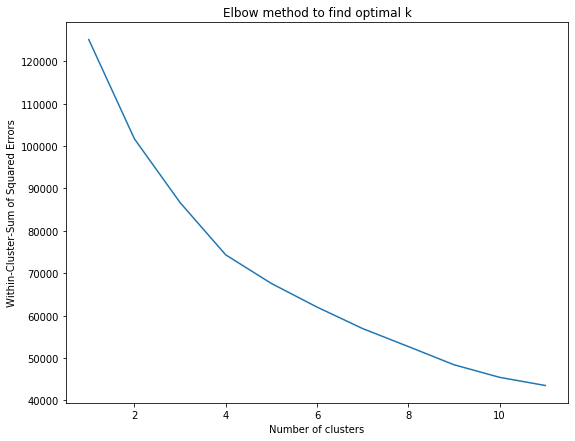

In [23]:
plt.figure(figsize=(9,7))
plt.plot(n_clusters, WSSE)
plt.xlabel('Number of clusters');
plt.ylabel('Within-Cluster-Sum of Squared Errors');
plt.title('Elbow method to find optimal k');

Selected number of clusters given scree plot (elbow method): 4

In [24]:
kmeans_final = KMeans(n_clusters=4, random_state=33)
kmeans_final.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=33, tol=0.0001, verbose=0)

In [25]:
kmeans_final.labels_

array([0, 3, 2, ..., 2, 0, 0], dtype=int32)

In [26]:
kmeans_final.cluster_centers_

array([[-1.31457829, -0.24034082,  0.56974538,  0.35467099,  0.05039637,
         0.16279846,  0.17321382, -0.04482541],
       [ 7.44506731,  1.33124659,  1.29284449,  0.56947446,  0.26615468,
         0.90124761,  0.64077929, -0.21551995],
       [ 1.12607121, -1.06781042, -0.66034533, -0.30501301, -0.10947386,
        -0.18224288, -0.16226258,  0.06235193],
       [-0.56816346,  3.45313158, -0.34688802, -0.45564457,  0.07558568,
        -0.24338255, -0.27158469,  0.02533742]])

In [27]:
pd.Series(kmeans_final.labels_).value_counts()

0    3894
2    3287
3    1175
1     280
dtype: int64

In [28]:
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942
...,...,...,...,...,...,...,...,...
8631,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,-0.870622
8632,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,-0.210773
8633,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,-0.630976
8634,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,-0.263088


In [29]:
cm = {0:'r', 1:'b', 2:'g', 3:'y'}
colors=[cm[i] for i in kmeans_final.labels_]

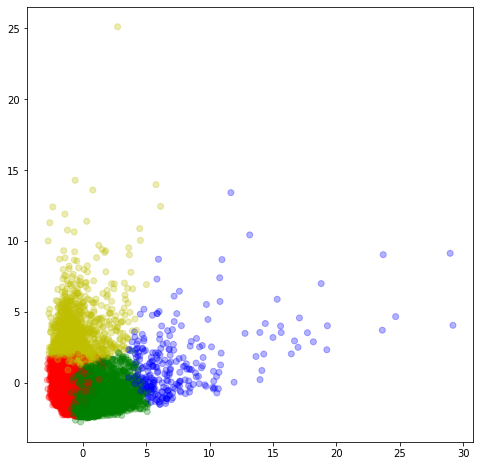

In [30]:
plt.figure(figsize = (8,8))
plt.scatter(pca_df['PC0'], pca_df['PC1'], c = colors, alpha=0.3)

In [31]:
scaled_df['cluster'] = kmeans_final.labels_ # create new cluster column

In [32]:
kmeans_final.labels_

array([0, 3, 2, ..., 2, 0, 0], dtype=int32)

In [33]:
scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181,0
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181,3
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181,2
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181,0
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800,0
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800,2
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800,2
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800,0


In [34]:
pred = kmeans_final.fit_predict(scaled_df)

In [35]:
scaled_df.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,-0.264041,-0.370793,-0.342707,-0.231524,-0.384508,-0.193356,-0.767373,-0.388043,-0.689129,-0.107347,-0.169804,-0.469768,-0.346616,-0.269099,-0.122883,-0.250685,-0.049350
1,1.156515,0.431617,3.787994,3.315615,2.863257,-0.073654,1.114420,1.798702,1.047139,-0.270597,-0.104835,3.294084,1.638086,2.443314,0.658055,0.448673,0.317039
2,-0.298417,0.275230,0.170675,0.054328,0.303350,-0.365352,0.999731,0.387765,0.891147,-0.465328,-0.360951,0.379730,-0.027529,-0.106408,-0.084205,0.407809,0.072746
3,1.434253,0.356028,-0.244379,-0.174803,-0.256636,1.680397,-0.519150,-0.227389,-0.458665,1.721966,1.597462,-0.290416,0.835357,0.607240,0.485985,-0.416959,-0.115502


Assign clusters to original customer dataset 

In [36]:
customer_df['cluster']=kmeans_final.labels_ # create new cluster column

In [37]:
customer_df.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,4014.395130,0.985153,9057.250657,6037.639100,3021.687682,834.016445,0.944642,0.737071,0.791176,0.082725,2.574394,98.934256,10427.162630,8701.012886,2408.303951,0.286349,11.951557
1,1047.939901,0.818027,282.793187,214.966895,68.175668,584.001724,0.188092,0.089482,0.094499,0.115944,2.140216,3.204931,3253.814415,1001.496656,572.774483,0.085037,11.469697
2,968.440955,0.952065,1389.340915,694.672743,694.858682,217.786830,0.896884,0.321841,0.722902,0.043627,0.815436,24.308420,4412.452792,1471.483243,661.214304,0.280603,11.628737
3,4606.630259,0.968977,495.868349,310.495983,185.458894,4558.860530,0.287691,0.137684,0.186239,0.485062,14.355745,7.720851,7578.684720,3551.327738,2017.270913,0.035778,11.382979


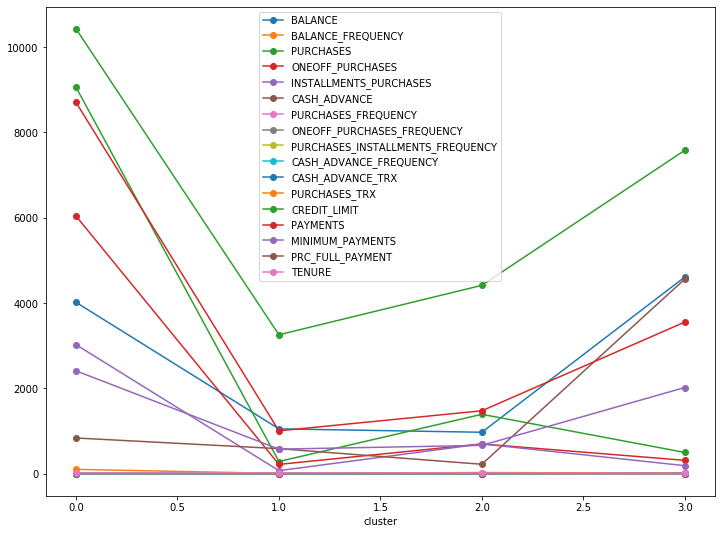

In [38]:
fig, ax = plt.subplots(figsize=(12,9));
customer_df.groupby('cluster').mean().plot(ax=ax, marker='o');

- Clusters 0 and 3 have most  balance, credit limit, minimum payments compared to clusters 1 and 2 with Cluster 3 having the highest balance and cluster 2 having the lowest balance
- Clusters 0 and 3 also have the highest credit limit compared to cluster 2 and 3 with cluster 0 having the highest credit and cluster 1 having the lowerst credit limit
- Cluster 0 has the highest purchases followed by cluster 2 and 3 with cluster 1 having the lowest purchases
- Cluster 3 has the highest cash advance with cluster 2 had lowest cash advance